# Titanic Dataset Notebook

### Notebook by: [Arunava](https://github.com/iArunava)

### Dataset: [Kaggle Titanic:Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In this notebook, I perform an analysis on the Titanic Dataset. The link to the dataset can be found at the start of the notebook.

# Required Libraries

(1) Numpy 
(2) Matplotlib 
(3) Pandas 
(4) scikit-learn

# Step 1: Let's get the Data and Feed the human mind

In [2]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Okay, so we imported the necesary modules now lets get the dataset and peek into the head of the data :)

In [3]:
df = pd.read_csv('./train.csv')
cdf = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ah! I see names, you think names effect your life? Anyway, we will take care of the names later. Let's continue with the analysis.

Let's first take a look at the survival rates of the different `Pclass`.

Note: We will be playing with the `cdf` DataFrame as I just copied it because of performing analysis.

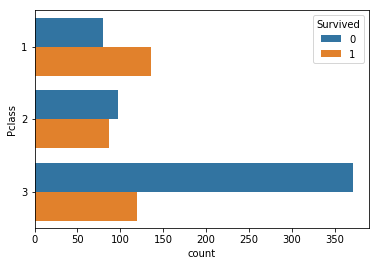

In [5]:
sns.countplot(y='Pclass', data=df, hue='Survived')
plt.show()

Gotcha! Most of the rich guys made out alive! 

So, we can draw a conclusion that the `Pclass` of person effects their `Survived` rate.

Just to be sure, let's look at the correlation.

In [6]:
corr_pclass_sur = df['Pclass'].corr(df['Survived'])
corr_pclass_sur

-0.3384810359610147

So, there is a negetive correlation, that means if the `Pclass` is higher `Death Rates` are lower.

Congratulations `Pclass` you just qualified to be in the final dataset. :claps:

So, who's next?

Let's consider the `sex` column. 

Giving it a thought, should `sex` of a person effect the `Survived` rate?

I don't wanna make a bad impression of myself to the readers of my notebook, So let's just do the analysis :P

**Data doesn't Lie**

So, let's just start with a visualization!

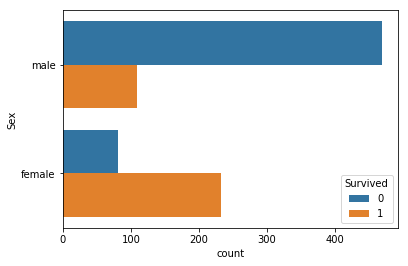

In [7]:
sns.countplot(y='Sex', data=df, hue='Survived')
plt.show()

Mmm! I see countless stories like Jack and Rose.

See girls! How selfless are us boys! Just make a note of that :P

Let's just look at the correlation to get an idea of 'How much selfless we really are' :P

In [8]:
corr_sex_sur = df['Survived'].corr(df['Sex'].map({'male':1, 'female':2}))
corr_sex_sur

0.543351380657755

OMG! That is too high!

I have got the numbers now girls!

I am going to take a snapshot of this and show everyone how selfless we really are :P

By the way, Congratulations `Sex` you just qualified to be in the final dataset!

Who's next in line?

`Age`?

Common' fella, I am very sure that you are a contributing factor!

Let's visualize the age!

One thing to notice is that we have ages as fractions, let's just round up the fractions!

P.S. I wanna round them down! But `Age` o `Age` I ducking hate you!

In [48]:
cdf['Age'] = df['Age'].map(lambda x : int(x) if not math.isnan(x) else float('nan'))

Question is what to do with NaNs ?

Well we cound get rid of those, let's take a look of how much information we would be losing if we did that

In [50]:
nans = sum(cdf['Age'].map(lambda x : 1 if math.isnan(x) else 0))
total = len(cdf)
percent_loss = (nans/total) * 100
percent_loss

19.865319865319865

We are losing ~20% data. The dataset is small we cannot afford to lose that amount of data.

Let's just take the mean and replace the `NaN`s

In [11]:
median_age = cdf['Age'].median()
cdf['Age'] = cdf['Age'].fillna(median_age)
nans = sum(cdf['Age'].map(lambda x : 1 if math.isnan(x) else 0))
nans

0

Okay! So, we replaced all the `NaN`s.

Lets now visualize how `Age` effects `Survived` rate.

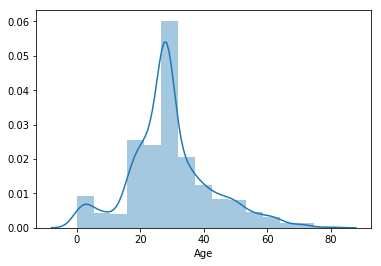

In [12]:
sns.distplot(cdf['Age'], bins=15)
plt.show()

Mmmmm, many of the passengers were around `18`-`45`

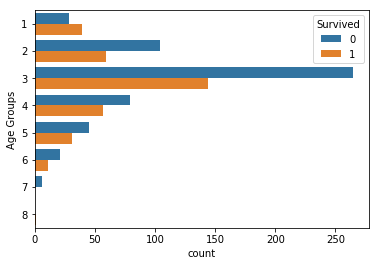

In [13]:
bins = np.linspace(0, 100, 10)
cdf['digitized'] = np.digitize(cdf['Age'], bins)
sns.countplot(y='digitized', hue='Survived', data=cdf)
plt.ylabel('Age Groups')
plt.show()

So, what I did is I divided the age groups into `10` bins and observed the `Survived` count for each bin.

Looking at the graph, I see non-survival rates higher in each group except the infant group. Man, This is not good!

Well, atleast the the survival rates in the infant group is higher! 

Well, we all get selfless when it comes to kids!

Okay, let's just get how much the two are correlated.

In [29]:
corr_age_sur = cdf['Age'].corr(cdf['Survived'])
corr_dig_sur = cdf['digitized'].corr(cdf['Survived'])
print (corr_age_sur)
print (corr_dig_sur)

-0.06490893816693674
-0.04593461529917282


The correlation doesn't seem to be very high.

Okay, I am not really sure about keeping this feature or not.

So, we will test it out later while building the model :)

Next, lets look at the `SibSp` column. This column represents the # of siblings / spouses aboard the Titanic for a person.

So, lets just visualize the Survival rate against the # of Siblings.

First, lets start with how many siblings one had on average.

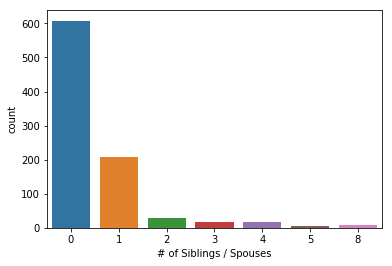

In [24]:
sns.countplot(x='SibSp', data=cdf)
plt.xlabel('# of Siblings / Spouses')
plt.show()

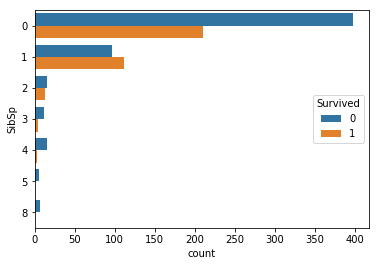

In [28]:
sns.countplot(y='SibSp', hue='Survived', data=cdf)
plt.show()

Let's just see the correlation between the two.

In [32]:
corr_sibsp_sur = cdf['SibSp'].corr(cdf['Survived'])
corr_sibsp_sur

-0.03532249888573558

There doesn't seem to be much of a correlation. So, we most probably will drop `SibSp` in the final dataset.

Next, let's look at the `Parch` Column which is # of parents / children aboard the Titanic. Okay!

Let's start with a visualization of the number of parents/children each had onboard.

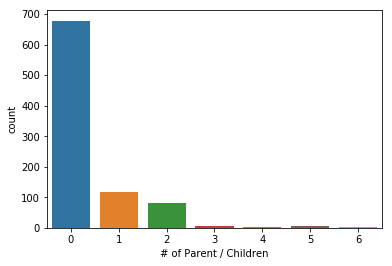

In [34]:
sns.countplot(x=cdf['Parch'], data=cdf)
plt.xlabel('# of Parent / Children')
plt.show()

Cool! Let's look at the Survival rates for each parch.

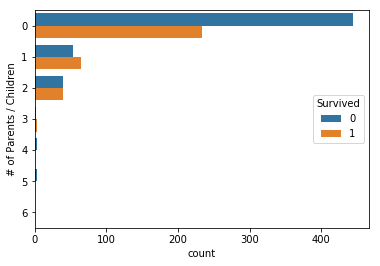

In [36]:
sns.countplot(y=cdf['Parch'], hue='Survived', data=cdf)
plt.ylabel('# of Parents / Children')
plt.show()

Mmmmm, not much correlation there as you can see probably!

Let's just look at the correlation between the two.

In [37]:
corr_parch_sur = cdf['Parch'].corr(cdf['Survived'])
corr_parch_sur

0.08162940708348365

Yeah! as I said not much correlation there. So, we will drop this column most probably in the final dataset.

Next, let's look at the .... `Ticket` ??

So, `Ticket`, specifically speaking the 'Name of the Tickets', that won't effect ones life, we can drop that without much thought :)

Next up iss ..... the `Fare` for the `Ticket`.

Hmmmm, we saw that 1st class people has more survivals so does higher fare means lower survival rate ?

Let's group the `Fare` into groups and visualize it!

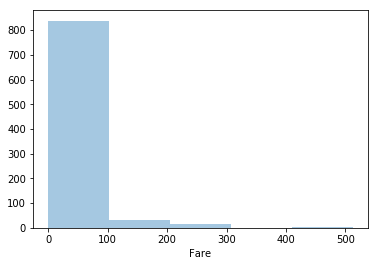

In [57]:
sns.distplot(cdf['Fare'], bins=5, kde=False)
plt.show()

So, most of the tickets were priced atmost `100` and a few in the range of `200`-`500`.

OKay, let's see the survival rates in each group. It wont say much as the data in the range `200-500` is too less.

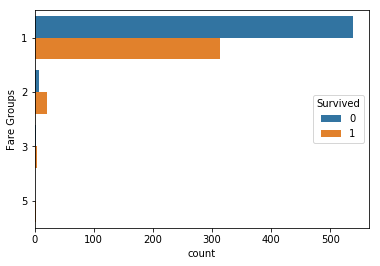

In [58]:
bins = np.linspace(0, 500, 5)
cdf['fare_bins'] = np.digitize(cdf['Fare'], bins)
sns.countplot(y='fare_bins', hue='Survived', data=cdf)
plt.ylabel('Fare Groups')
plt.show()

So, as I said we cannot infer much from this as most the people belongs to the first group.

Let's look at the correlation.

In [60]:
corr_fare_sur = cdf['fare_bins'].corr(cdf['Survived'])
corr_fare_sur

0.1438544108288689

There seems to be a positive correlation. So, let's just keep `Fare`.

Next? `Cabin`

..# TODO [Analyze `cabin`]

Okay! Who's next? 

`Embarked`

Let's just visualize the survival rates for people from each port of embarkation.

Although we should understand that survival rate of people doesn't depend on the Port of Embarkation of a person.

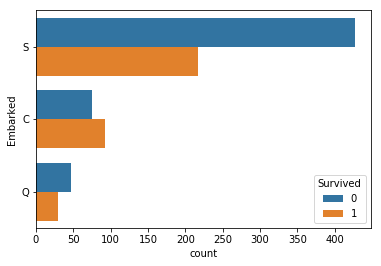

In [63]:
sns.countplot(y=cdf['Embarked'], hue='Survived', data=cdf)
plt.show()

So, as said, survival rates are variable in this and we cannot infer whether a person will die or live based on where the person embarked from.

Okay!

So, here's what we are going to do with the columns:

PassengerId -> Drop [As it the index we are gonna drop that]

Survived 	-> KEEP (target value)

Pclass 	    -> keep

Name 	    -> Drop

Sex 	    -> Keep

Age 	    -> Keep /Drop

SibSp 	    -> Drop

Parch 	    -> Drop

Ticket 	    -> Drop

Fare 	    -> Keep /Drop

Cabin 	    -> Drop

Embarked    -> Drop

# Step 2: Preprocessing and Building the final Dataset

So, we got the columns that we would keep, so let's keep those and drop the rest!

Also, in the process let's seperate out the target value `Survivied`

In [70]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

So, we now have the `X` and the `y` and let's now process the data whereever required.